In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import second_order_markov
import get_reddit_data

# Onion or Not?
An Analysis of News Titles Generated Using a Second-Order Markov Generator By Olivia Jo Bradley

## Introduction
Fake news is a common topic in our current climate, especially post-2020 election. With this project, I have been able to create fake news titles and analyze the titles.

I used second-order Markov generation to produce news article titles from both real and fake news sources. Second-order Markov generation differs from first-order Markov generation by looking at the previous two words in the sentence to generate the next word, instead of just the single previous word. After producing titles, I analyzed them by comparing how many were unique and different from the original titles, as well as surveying Olin community members to see if they can tell the generated titles apart from the real titles.
 
One of my other main goals of this project was to challenge myself. I wanted to try using the Reddit API, which required me to read through new documentation. I also wanted to improve upon the Markov generation we used in assignment 2 and make my titles less confusing, which I did by researching and implementing second-order Markov generation.

## Methodology
To gather the titles, I created a Reddit application that uses Reddit's API to pull the titles of posts from news based subreddits. I chose to pull from r/TheOnion and r/nottheonion, but some other applicable subreddits are r/news, r/politics, and other subreddits with strict rules where the post titles can only be news titles. The reason I chose these subreddits are due to their consistent titles specifically during our current election (this project was completed during the 2020 election). I pulled as many top, new, hot, controversial, and rising posts from each subreddit as I am able to, which gathers about 2500 unique titles, depending on the frequency of posts at the time. You will see the phrase "Successfully pulled x-number of titles" when any of the code is run, as I chose to print the number of titles because the number varies so much.  I stored these titles as strings in a list. 

To use these titles to generate fake titles, I had to process them. The main way I did this was adding a special start and end character to each title. In typical sentence Markov generation, it is assumed that your sentences end with a punctuation character, and titles do not usually have this, but will sometimes have quotes or honorifics that contain punctuation. By adding start and end characters that arent typically found in titles, I am able to definitively mark the beginning and end of each sentence. 

Once I had a list of titles, I created a dictionary that maps the previous two words of each sentence to all of the possible following words. 

The next step is to generate a new title. I began by selecting a start word, which is a word that begins with the start character. Once that first word is selected, I find the second word, and with the pair I am able to use the dictionary to pick the next character, and will continue to select the next character until the word selected ends with the end character.

In the following cell, you can see an example of 2 generated titles from real news sources.

In [3]:
second_order_markov.markov_generate_multiple_titles("nottheonion", 2)

Successfully pulled 2709 nottheonion titles.


["Cabinet Office to hire photographer in effort to level up government's image",
 'Obama dreams of opening a T-shirt shack in Hawaii after he helped kill FCC caps']

With the list of generated titles, I am able to compare them to the original titles, and remove any generated title that are exactly the same as a title from the source text. Below you can see an example for two unique titles generated from real news sources.

In [4]:
second_order_markov.unique_markov_titles("nottheonion", 2)

Successfully pulled 2709 nottheonion titles.
Successfully pulled 2709 nottheonion titles.


['Poll: 80% of voters think the U.S. is spiraling out of cheese',
 'British politician wants death penalty for abortion']

## Results
A large percentage of the generated titles are exactly the same as a title from the source text. These graphs below show the percentage of duplicate and unique titles for 1000 tests. 

Successfully pulled 2552 TheOnion titles.


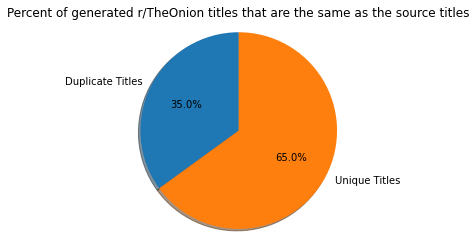

In [5]:
second_order_markov.pie_chart_percentage_duplicates("TheOnion", 1000)

Successfully pulled 2709 nottheonion titles.


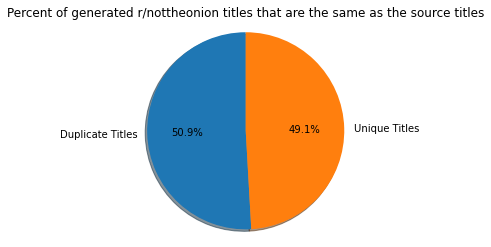

In [6]:
second_order_markov.pie_chart_percentage_duplicates("nottheonion", 1000)

My next step was to compare my generated titles to real titles. I did this by sending out a survey to the greater Olin College community using the helpme mailing list. You can see [the survey here](https://docs.google.com/forms/d/e/1FAIpQLSewxiEyzmg8YS5Ws5G2zIpOgTa1BlxM0p2Ze5NYJywyDXjUQQ/viewform).

The titles and correct answers are as follows:

For The Onion titles:
1. Miami-Dade post office seeks state compensation for costs of abandoned election
**Generated**
2. Portable, inflatable people may be solution to dingoes and livestock co-existing
**Real**
3. Verizon is supplying phone call data to US spy agencies
**Generated**
4. Demi Lovato shares UFO sightings and says she contacted aliens
**Real**
5. Mysteries of the 2,500-year-old butter found at the bottom of a loch
**Real**

For the real news titles:
6. Right-Wing Militia Wondering When Someone Will Notice They’ve Been Holding J.B. Pritzker Hostage For Months
**Real**
7. Bush Says He Still Believes Iraq War Happened
**Generated**
8. Donald Trump Jr. Tries To Commit Suicide By Smoking Joint
**Generated**
9. Trump Attempts To Pivot Narrative Away From Coronavirus Controversy By Molesting Child Of Fallen Soldier
**Real**
10. Experts Warn Prosecuting Assange Creates Slippery Slope To Eliminating Racism Entirely
**Generated**

The survey had 83 responses. Some interesting notes are the average score was 5.28/10 correct, and the median was 5/10 correct, with a range of 2-10 correct. Below are two pie charts that show the percentage that were answered correctly in each section.

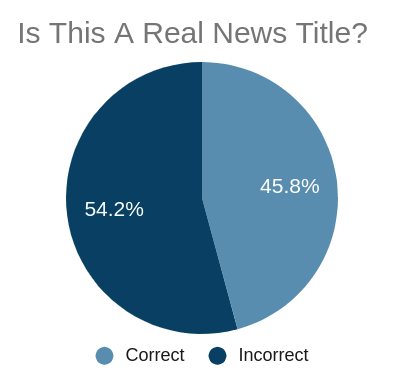 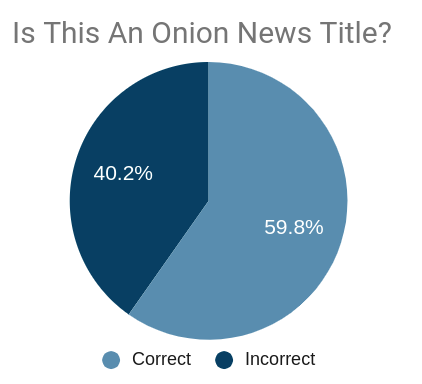

Overall, the generated titles were fairly similar, and could successfully "fool" people. Interestingly enough, people were better at telling apart the Onion titles then the real news titles.
This survey was not perfect though, I do believe there was some bias in the titles I chose for the survey. I did try my best to choose them at random, but in further testing and use of my program, I have run into some obviously fake titles (such as *Facebook Is Permabanning Oculus Quest 2 Owners for Owning an Oculus Quest 2 Owners for Owning an Oculus Quest 2 Owners for Owning an Oculus Quest 2*), which were not represented accurately in the survey. 

## Conclusion

One really important insight from this project is how easy it is to create a convincing fake title. A lot of these fake titles seem to be combinations of two other titles, that have an overlapping phrase, so when they are stiched together they make grammatical sense. I did not expect the survey results to show the titles were so convincing, and leads to some interesting questions about the news we see every day, how absurd it can seem, and how hard it is to find that line between too absurd for real life.
 
One of the greatest challenges in this project was dealing with the inconsistencies in my data. There were various formatting issues, such as emojis and other characters in the titles, which lead me to removing emojis and creating specific start and end characters. I was also able to learn a lot about accessing Reddit's API, while I only pulled titles for this project, I am interested in all some of the other things I can do with PRAW, including getting information from comments and Redditors.

If I had more time, I would like to improve some of the formatting issues in the titles. Not all Reddit posts follow the formatting I would prefer, for example, title capitalization is not consistent, and inconsistent formatting is a bit of a "tell" for fake, generated titles. I would also like to improve the efficiency and run time of my code, which can be done by improving the selection for the first word of each title, and removing some unnecessary keys in the dictionary. 